<a href="https://colab.research.google.com/github/NhaBaodang/KT_AI/blob/main/food.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.optimizers import SGD, RMSprop
from keras.models import Sequential, load_model
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils import np_utils, to_categorical, load_img, img_to_array
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten, LeakyReLU

from sklearn import preprocessing
from sklearn.utils import validation
from sklearn.model_selection import train_test_split

In [ ]:
data="/content/drive/MyDrive/Food/"

In [ ]:
Data = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
Train = Data.flow_from_directory(data, target_size=(150,150),batch_size=32, class_mode='categorical')
Train.class_indices

Found 250 images belonging to 10 classes.


{'banhbeo': 0,
 'banhcanh': 1,
 'banhcuonphuyen': 2,
 'banhlagai': 3,
 'banhxeo': 4,
 'chaolong': 5,
 'che': 6,
 'comtam': 7,
 'galuoc': 8,
 'pho': 9}

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(10,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 128)      0

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
train=model.fit(Train, epochs=50, batch_size=256, verbose=1)

Epoch 1/50
8/8 [==============================] - 134s 15s/step - loss: 13.1408 - accuracy: 0.1040
Epoch 2/50
8/8 [==============================] - 4s 515ms/step - loss: 2.2322 - accuracy: 0.1840
Epoch 3/50
8/8 [==============================] - 3s 426ms/step - loss: 1.8728 - accuracy: 0.2760
Epoch 4/50
8/8 [==============================] - 6s 725ms/step - loss: 1.5670 - accuracy: 0.4280
Epoch 5/50
8/8 [==============================] - 3s 424ms/step - loss: 1.3402 - accuracy: 0.5520
Epoch 6/50
8/8 [==============================] - 3s 422ms/step - loss: 1.2021 - accuracy: 0.5680
Epoch 7/50
8/8 [==============================] - 4s 447ms/step - loss: 0.9806 - accuracy: 0.6560
Epoch 8/50
8/8 [==============================] - 4s 556ms/step - loss: 0.8396 - accuracy: 0.6880
Epoch 9/50
8/8 [==============================] - 3s 443ms/step - loss: 0.7102 - accuracy: 0.7600
Epoch 10/50
8/8 [==============================] - 3s 426ms/step - loss: 0.6566 - accuracy: 0.7680
Epoch 11/50
8/8 [=

In [ ]:
Score=model.evaluate(Train,verbose=0)
print('Hàm Mất Mát Trên Tập Kiểm Tra : ', Score[0])
print('Độ Chính Xác Trên Tập Kiểm Tra : ', Score[1])

Hàm Mất Mát Trên Tập Kiểm Tra :  0.023240920156240463
Độ Chính Xác Trên Tập Kiểm Tra :  0.9919999837875366


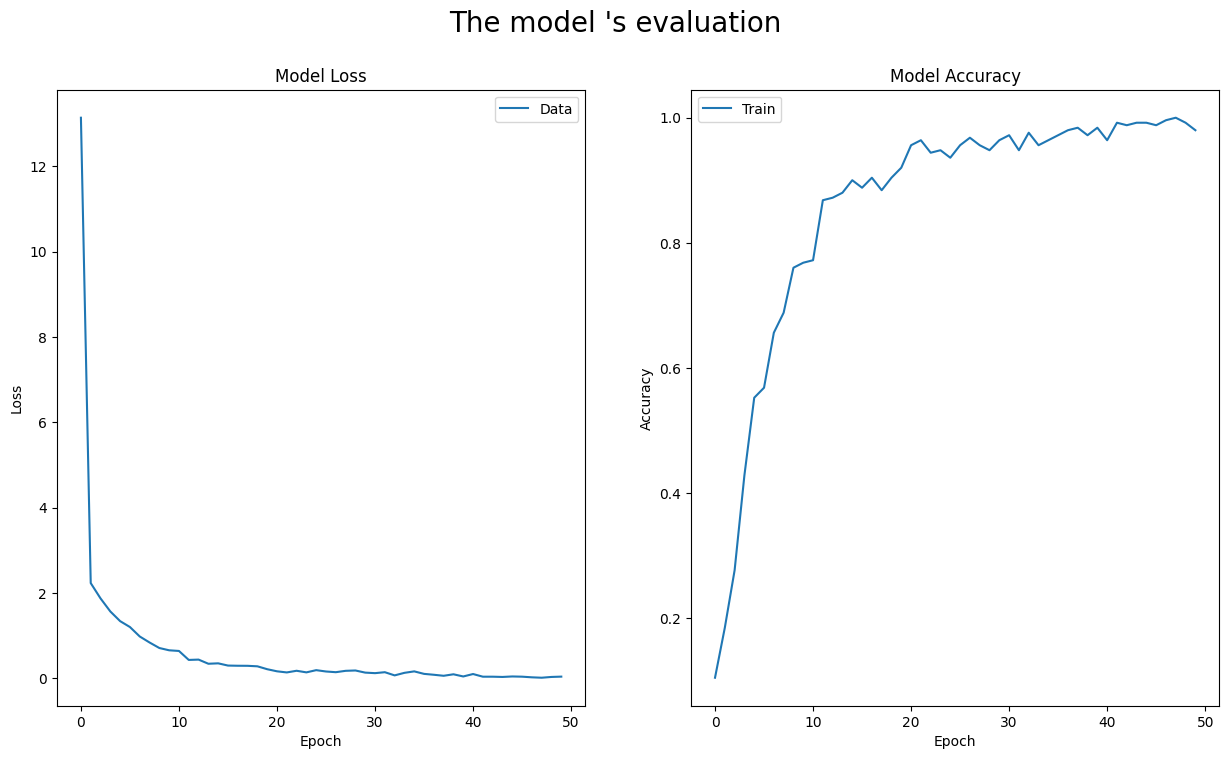

In [ ]:
fig,axes = plt.subplots(1,2, figsize=(15,8))
fig.suptitle("The model 's evaluation ",fontsize=20)

axes[0].plot(train.history['loss'])
axes[0].set_title('Model Loss')
axes[0].set_ylabel('Loss')
axes[0].set_xlabel('Epoch')
axes[0].legend(['Data'])

axes[1].plot(train.history['accuracy'])
axes[1].set_title('Model Accuracy')
axes[1].set_ylabel('Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].legend(['Train'])
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/food.h5')

In [ ]:
model_1 = load_model('/content/drive/MyDrive/food.h5')

1/1 [==============================] - 0s 19ms/step
Đây là món: cháo lòng


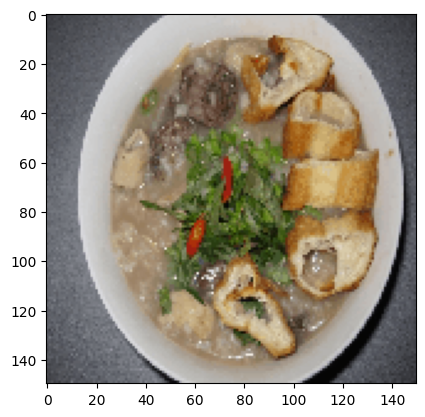

1/1 [==============================] - 0s 17ms/step
Đây là món: cơm tấm


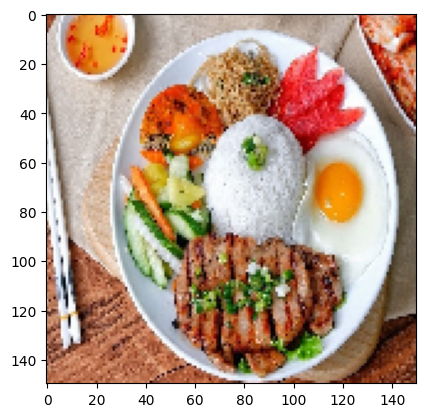

1/1 [==============================] - 0s 17ms/step
Đây là món: bánh canh


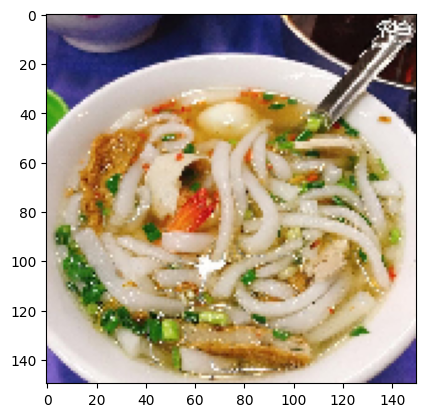

1/1 [==============================] - 0s 17ms/step
Đây là món: bánh cuốn phú yên


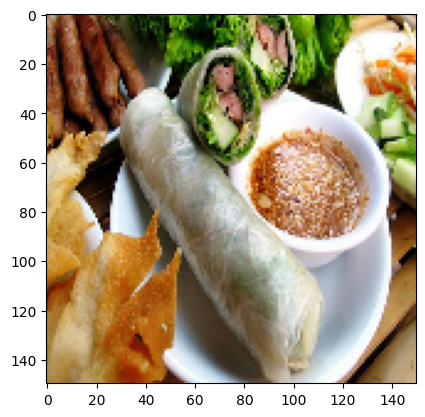

1/1 [==============================] - 0s 19ms/step
Đây là món: bánh bèo


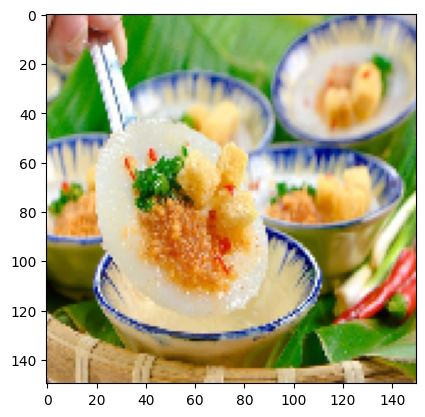

1/1 [==============================] - 0s 18ms/step
Đây là món: bánh lá gai


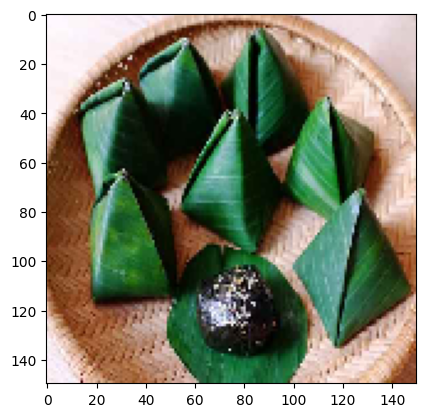

1/1 [==============================] - 0s 31ms/step
Đây là món: gà luộc


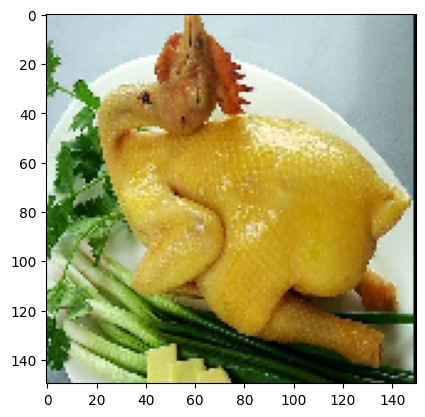

1/1 [==============================] - 0s 18ms/step
Đây là món: phở


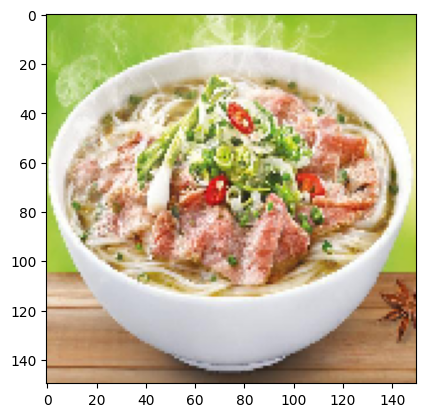

1/1 [==============================] - 0s 17ms/step
Đây là món: chè


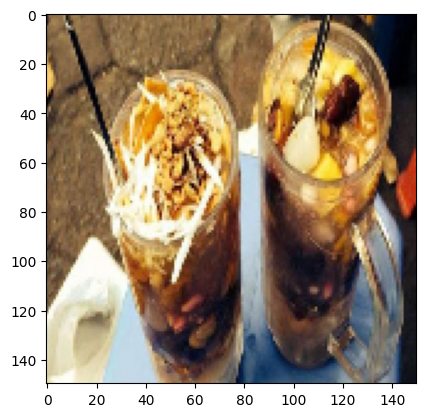

1/1 [==============================] - 0s 17ms/step
Đây là món: bánh xèo


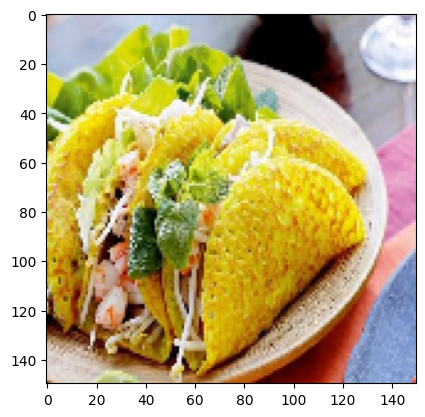

In [ ]:
folder='/content/drive/MyDrive/Text_Food/'
for i in os.listdir(folder):
  img=load_img(folder+i, target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=(model_1.predict(img).argmax())
  class_name=['bánh bèo', 'bánh canh', 'bánh cuốn phú yên', 'bánh lá gai', 'bánh xèo','cháo lòng','chè','cơm tấm','gà luộc','phở']
  print('Đây là món: {}'.format(class_name[result]))
  plt.show()